In [4]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.model_selection import train_test_split

%matplotlib inline

The shape of the features is: (40, 1)
The shape of the targets is: (40,)


Text(0, 0.5, 'Target')

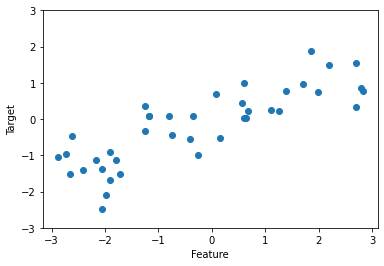

In [5]:
# Importing the dataset
X, y = mglearn.datasets.make_wave(n_samples = 40)

print('The shape of the features is: {}'.format(X.shape))
print('The shape of the targets is: {}'.format(y.shape))

# Plotting the dataset
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [6]:
# Splitting the wave dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Creating the KNN Regressor
reg = KNeighborsRegressor(n_neighbors = 3)
# Training the model
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [7]:
print('Test set features: \n {}'.format(X_test))
print('Train set targets: \n {}'.format(y_test))
print('Test set predictions: \n {}'.format(reg.predict(X_test)))

Test set features: 
 [[-1.24713211]
 [ 0.67111737]
 [ 1.71105577]
 [-2.06388816]
 [-2.87649303]
 [-1.89957294]
 [ 0.55448741]
 [ 2.81945911]
 [-0.40832989]
 [-2.72129752]]
Train set targets: 
 [ 0.37299129  0.21778193  0.96695428 -1.38773632 -1.05979555 -0.90496988
  0.43655826  0.7789638  -0.54114599 -0.95652133]
Test set predictions: 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [8]:
# Evaluating the model
test_score = reg.score(X_test, y_test)
print('The test score for the KNN regression model is: {}'.format(test_score))

The test score for the KNN regression model is: 0.8344172446249605


## Using a Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Creating the object
lr = LinearRegression()
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
print("lr.coef_: {}".format(lr.coef_))  
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.52424272]
lr.intercept_: -0.09394309015377249


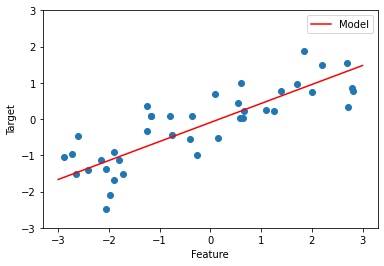

In [13]:
# Plotting the dataset
model_y = lr.coef_ * np.linspace(-3.0, 3.0, num=100) + lr.intercept_
plt.plot(X, y, 'o')
plt.plot(np.linspace(-3.0, 3.0, num=100) , model_y, 'red', label = 'Model')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

## The  Boston housing dataset

In [14]:
from sklearn.datasets import load_boston

boston = load_boston()
print('The data shape is: {}'.format(boston.data.shape))

The data shape is: (506, 13)


In [15]:
# Extended version of the Boston dataframe
X, y = mglearn.datasets.load_extended_boston()
print('The shape of the extended dataset is: {}'.format(X.shape))

The shape of the extended dataset is: (506, 104)


In [20]:
# Splitting the dataset and training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
lr = LinearRegression().fit(X_train, y_train)

In [24]:
print('Training set score is: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score is: {:.2f}'.format(lr.score(X_test, y_test)))
# There is overfitting

Training set score is: 0.95
Test set score is: 0.61


## Ridge regression

In [25]:
from sklearn.linear_model import Ridge  
# model
ridge = Ridge().fit(X_train, y_train)  
# Printing score
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))  
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [26]:
# Ridge with alpha = 10
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)  
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))  
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [27]:
# Ridge with alpha = 0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)  
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))  
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


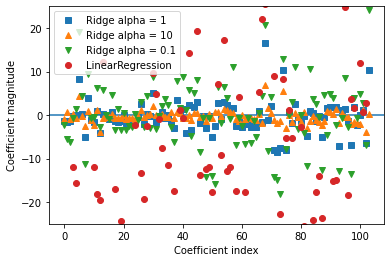

In [28]:
plt.plot(ridge.coef_, 's', label="Ridge alpha = 1")  
plt.plot(ridge10.coef_, '^', label="Ridge alpha = 10")  
plt.plot(ridge01.coef_, 'v', label="Ridge alpha = 0.1")  
plt.plot(lr.coef_, 'o', label= "LinearRegression" )  
plt.xlabel("Coefficient index")  
plt.ylabel("Coefficient magnitude")  
xlims = plt.xlim()  
plt.hlines(0, xlims[0], xlims[1])  
plt.xlim(xlims)  
plt.ylim(-25, 25)  
plt.legend()

## Implementing Lasso regression

In [29]:
from sklearn.linear_model import Lasso  

# Creating the model
lasso = Lasso().fit(X_train, y_train)  

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))  
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))  
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [31]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)  

print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))  
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))  
print("Number of features used:", np.sum(lasso001.coef_ != 0))
print("Weights:", np.sum(lasso001.coef_))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33
Weights: -32.68683893020213
